In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("C:/Users/Asus/Desktop/Cement Sector Data Scienece Data/Concrete_Data.csv")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.shape

(1030, 9)

In [10]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
 #Inferences :
# Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.
# Also, slag and ash, superplastic has min value as 0, which cannot be in he composition of cement.
# in cement., min = 102, std = 104, range is 102 - 540, does the nearing value of std and min indicate something?
# In col Water , std is < min value, shuld we consider this variable for further analysis

# considering the difference b/w ( Q1,median ) and (Q3 and median) in columns slag,ash there are huge number of outliers.
# Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers

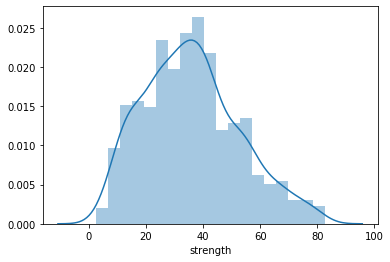

In [12]:
import seaborn as sns
sns.distplot(df['strength'])

In [13]:
#Target Variable i.e. strength has almost normaly distributed. 
#Lets check the skewness of the target varibale
Skewness = df['strength'].skew()
Skewness

0.416977288410718

In [14]:
# Since skew value is less than 0.5, it means it is positively skewed.

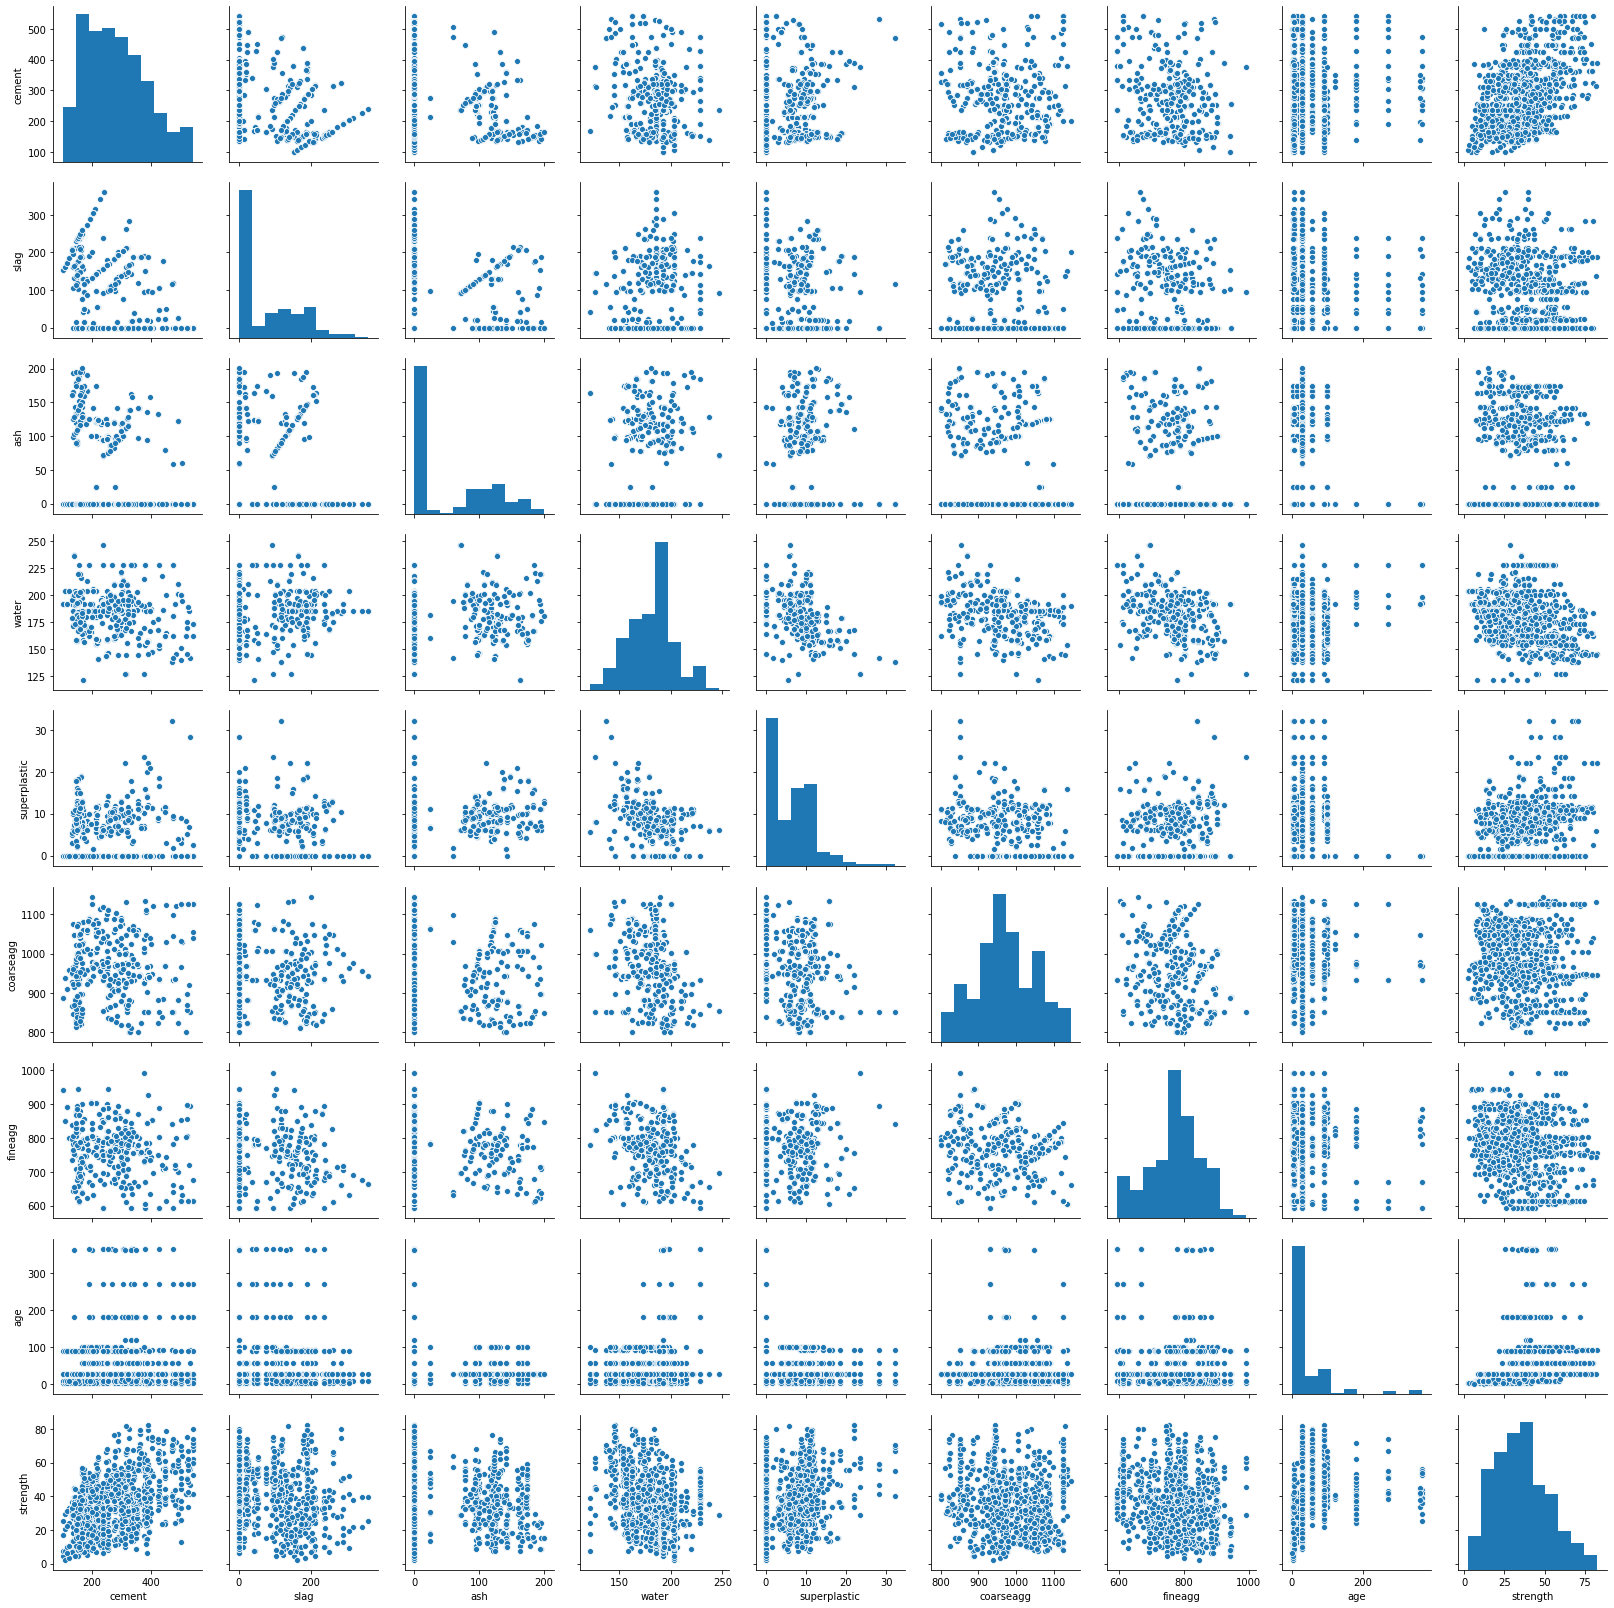

In [15]:
sns.pairplot(df)

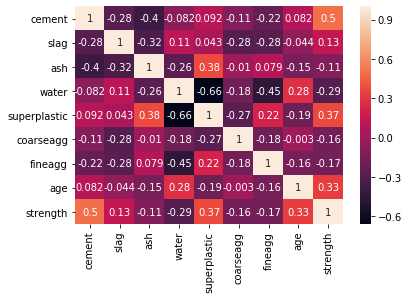

In [16]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [17]:
#  Cement strenght vary from 17Mpa, 18-28Mpa and 28-70Mpa. So we can divide df into three parts.

# It is evident that cement and age, superplastic have good positive corr with strength, 
cement being the strong predictor Water has a good negative correlation with Strength,
where are there are other variables with very less correlation there are good correlation amng variables : 
cement -> Slag = -ve relation and strength-> +ve Slag -> ash and fineaggg = -ve Water -> superplastic , fineagg strength = -ve superplastic -> ash and
Strength positive correlation between water and slag age -> Strength and water

In [18]:
# We will define a label function in 12 different parts , to see the age distribution w.r.t. months

In [19]:
def label(data):
    if data['age'] <=30:
        return '1'
    if data['age']>30 and data['age']<=60:
        return '2'
    if data['age']>60 and data['age']<=90:
        return '3'
    if data['age']>90 and data['age']<=120:
        return '4'
    if data['age']>120 and data['age']<=150:
        return '5'
    if data['age']>150 and data['age']<=180:
        return '6'
    if data['age']>180 and data['age']<=210:
        return '7'
    if data['age']>210 and data['age']<=240:
        return '8'
    if data['age']>240 and data['age']<=270:
        return '9'
    if data['age']>270 and data['age']<=300:
        return '10'
    if data['age']>300 and data['age']<=330:
        return '11'
    else:
        return'12'
df['age_month'] = df.apply(lambda df:label(df),axis=1)

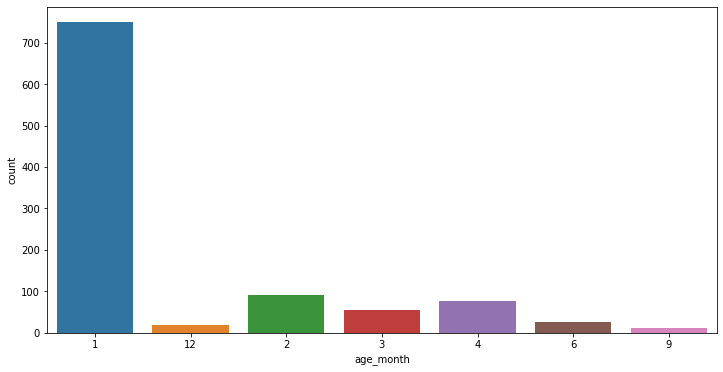

In [20]:
plt.figure(figsize=(12,6))
order = ['1','2','3','4','5','6','7','8','9','10','11','12']
ax = sns.countplot(df['age_month'])
plt.show()

In [21]:
df2 = df.copy(deep=True)
def lab(data2):
    if data2['strength']<=17:
        return '1'
    if data2['strength']>17 and data2['strength']<=28:
        return '2'
    else:
        return '3'
df2['strength_category']= df2.apply(lambda df2:lab(df2),axis=1)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
cement               1030 non-null float64
slag                 1030 non-null float64
ash                  1030 non-null float64
water                1030 non-null float64
superplastic         1030 non-null float64
coarseagg            1030 non-null float64
fineagg              1030 non-null float64
age                  1030 non-null int64
strength             1030 non-null float64
age_month            1030 non-null object
strength_category    1030 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 88.6+ KB


In [23]:
df2['age_month'] = df2['age_month'].astype('int')
df2['strength_category'] = df2['strength_category'].astype('int')

In [24]:
# Now we will detect the outliers and later apply different algorithm model 

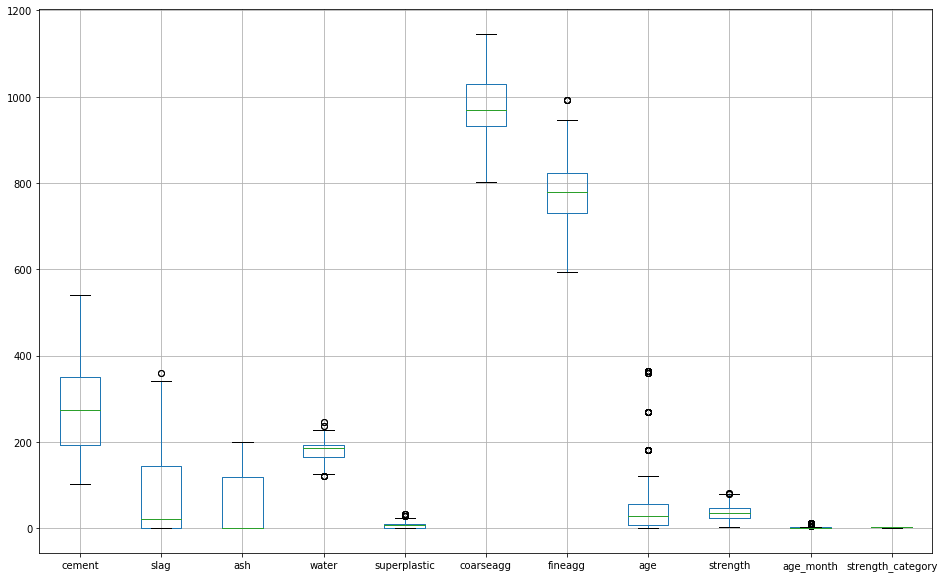

In [25]:
plt.figure(figsize=(16,10))
df2.boxplot()


In [26]:
x = df2.iloc[:,df2.columns !='strength']
y = np.array(df2['strength'])

In [27]:
x.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,age_month,strength_category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1,3
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1,3
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,9,3
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,12,3
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,12,3


In [28]:
low_quantile = x.quantile(0.05)
high_quantile =x.quantile(0.95)

In [29]:
low_quantile

cement               143.745
slag                   0.000
ash                    0.000
water                146.100
superplastic           0.000
coarseagg            842.000
fineagg              613.000
age                    3.000
age_month              1.000
strength_category      1.000
Name: 0.05, dtype: float64

In [30]:
high_quantile

cement                480.000
slag                  236.000
ash                   167.000
water                 228.000
superplastic           16.055
coarseagg            1104.000
fineagg               898.090
age                   180.000
age_month               6.000
strength_category       3.000
Name: 0.95, dtype: float64

In [31]:
low_outliers_data = (x< low_quantile)
high_outliers_data = (x > high_quantile)
x.mask(low_outliers_data,low_quantile,axis=1,inplace=True)
x.mask(high_outliers_data,high_quantile,axis=1,inplace=True)

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\generic.py:8834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors, try_cast=try_cast)
C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\generic.py:8834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors, try_cast=try_cast)


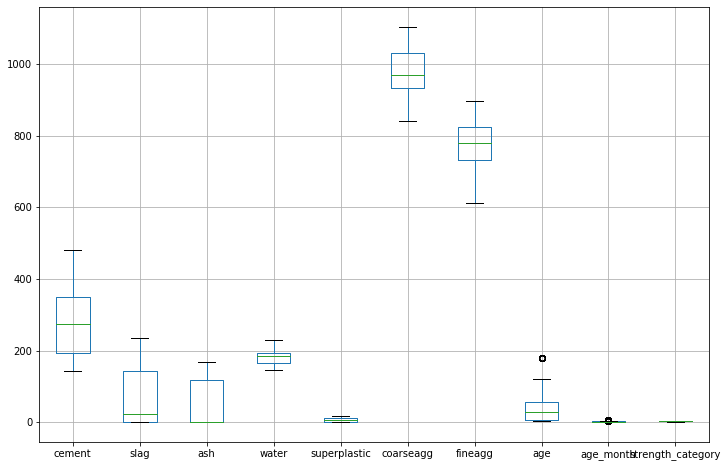

In [32]:
plt.figure(figsize=(12,8))
x.boxplot()

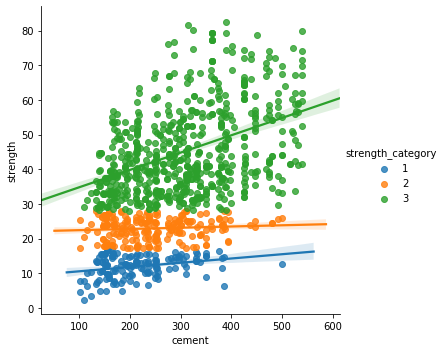

In [33]:
sns.lmplot(x='cement',y='strength',data= df2,hue= 'strength_category')

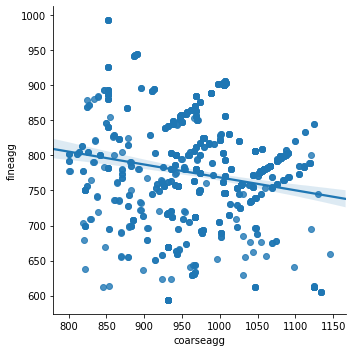

In [34]:
sns.lmplot(x='coarseagg',y='fineagg',data=df2)

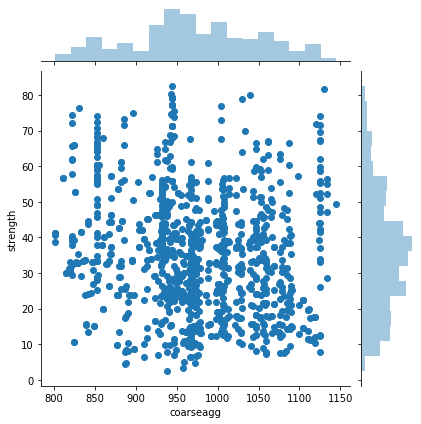

In [35]:
sns.jointplot(df2['coarseagg'],df2['strength'])

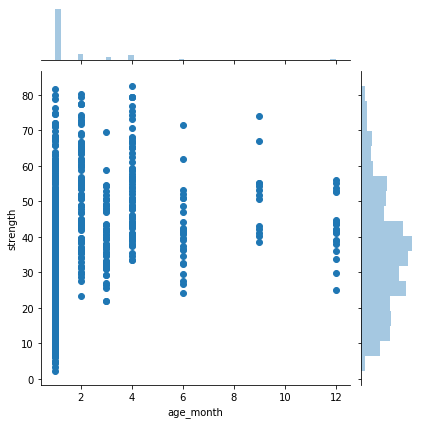

In [36]:
sns.jointplot(df2['age_month'],df2['strength'])

In [37]:
from sklearn.preprocessing import MinMaxScaler
df2.drop(['age'],axis=1,inplace=True)
scaler = MinMaxScaler()
df2_normalized = scaler.fit_transform(x)
df2_normalized = pd.DataFrame(df2_normalized,columns=x.columns)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2_normalized,y,test_size=0.30,random_state=5)

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

In [40]:
print(lm.score(x_train,y_train))
print(lm.score(x_test,y_test))

0.8129066741900719
0.7879945770079386


In [41]:
lm.coef_

array([ 32.23128989,  18.99553599,   8.91899891, -14.95139494,
         2.05808523,   5.120399  ,   3.94903999,  59.95571275,
       -32.85215417,  15.48128776])

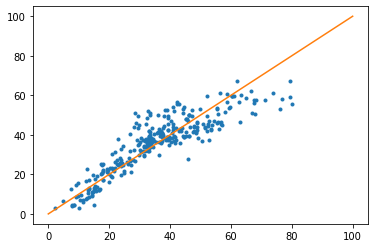

In [42]:
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)